# Inverse Laplace Transform

* Pole/Residue Decomposition
* Partial fraction decomposition
* Final value theorem

## Pole/Residue Decomposition

In [1]:
%matplotlib inline
import control
import sympy
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as  plt

In [2]:
s = control.tf([1, 0], [0, 1])
G = (s + 1)/(s**2 + 2*s + 3)
G

TransferFunction(array([1, 1]), array([1, 2, 3]))

In [6]:
s = control.tf([1, 0], [0, 1]) 
G = (s + 1)/(s**2 + 2*s + 3)
G

TransferFunction(array([1, 1]), array([1, 2, 3]))

In [8]:
sig.residue([1, 3, 3], [1, 3, 2])

(array([ 1., -1.]), array([-1., -2.]), array([1.]))

In [11]:
r_vect, p_vect, k = sig.residue(G.num[0][0], G.den[0][0])
r_vect, p_vect, k

(array([0.5+0.j, 0.5-0.j]),
 array([-1.+1.41421356j, -1.-1.41421356j]),
 array([], dtype=float64))

We now reconstruct the signal using the inverse laplace transform for each pole/residue term.

$g(t) = \mathcal{L}^{-1}\left[k + \sum\limits_{i=1}^{k} \dfrac{R_i}{s-p_i}\right] = k \delta(t) + \sum\limits_{i=1}^{k} R_i e^{p_it}$

The residue may be found in general even for for repeated roots or order $m$, using:

$F(s) = \dots + \sum\limits_{k=0}^{m-1}\dfrac{r_k}{(s-p)^{m-k}}$


$ r_k = \dfrac{1}{k!}\left[ \dfrac{d^k}{ds^k} (s-p)^m F(s)\right]_{s=p}$

In [12]:
t = np.linspace(0, 20, 100)
y = np.zeros(len(t), dtype=complex)
for r, p in zip(r_vect, p_vect):
    y += r*np.exp(p*t)
#y += k[0]
assert np.linalg.norm(np.imag(y) < 1e-10)  # make sure imaginary is negligible
y = np.real(y)

We compare this to the impulse response of $G(s)$, which should be the same.

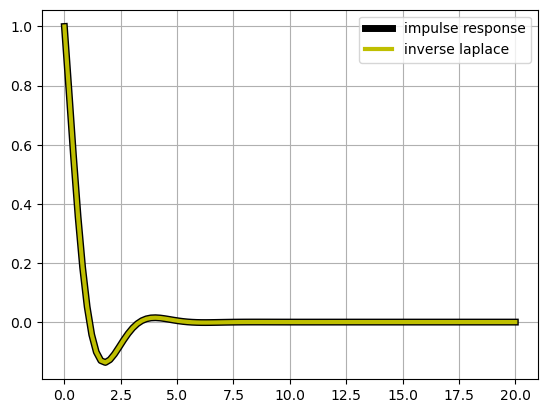

In [13]:
t_imp, y_imp = control.impulse_response(G, T=t)
plt.plot(t_imp, y_imp, 'k', linewidth=5, label='impulse response')
plt.plot(t, y, 'y', linewidth=3, label='inverse laplace')
plt.grid()
plt.legend()

## DC Motor Example

<img src="fig/dc-motor.png" alt="Drawing" style="width: 400px;" align="left"/>


The torque, $T$, is proportional to the current, $i$ with constant $K$:

$T = K i$

The back EMF is proportional to the shaft rotational speed with constant $K$:

$e = K\dot{\theta}$

The equation of motion for the motor shaft is:

$J \ddot{\theta} + b \dot{\theta} = T$

Kirchhoff's voltage law gives:

$L \dfrac{di}{dt} + Ri = V - e$

Equations of motion and transfer function derived in hotseat exercise.

## Final Value Theorem

In [6]:
G2 = 1/ (s*(s**2 + 2*s + 2))
G2

TransferFunction(array([1]), array([1, 2, 2, 0]))

The final value theorem, is typicaly stated as:

If $s Y(s)$ has poles with only negative real part, $s Y(s)$ is stable, then:

$\lim\limits_{t \rightarrow \infty} y(t) = \lim\limits_{s \rightarrow 0} s Y(s)$

Note that this definition is a more general than the version in the notes which may be considered to be a DC gain theorem and only applies for constant input signals. The version stated here applies for arbitary input signals, $u(t)$, where the output $y(t)$, has a Laplace transform given by $Y(s) = G(s)U(s)$.

Stated another way:

$\lim\limits_{t \rightarrow \infty} y(t) = \lim\limits_{s \rightarrow 0} s G(s) U(s)$

If we assume u is a constant, u_0:

$\lim\limits_{t \rightarrow \infty} y(t) = \lim\limits_{s \rightarrow 0} s G(s) (u_0/s)
= \lim\limits_{s \rightarrow 0} G(s) u_0 = G(0) u_0$

And we then arrive with the theorem given in the notes:

$\lim\limits_{t \rightarrow \infty} y(t) = G(0) u_0$

In [7]:
def do_analysis(G, U_list):
    for U in U_list:
        Y = control.minreal(G*U)
        final_value = np.real(control.minreal(s*Y).horner(0)[0][0])

        print('U:', U)
        print('final value:', final_value)

        plt.figure()
        t, u = control.impulse_response(U, T=np.linspace(0, 10))
        t, y = control.impulse_response(G*U, T=np.linspace(0, 10))
        plt.hlines(final_value, t[0], t[-1], label='asymptote')
        plt.plot(t, y, label='y')
        plt.plot(t, u, 'r', label='u')
        plt.xlabel('t, sec')
        plt.ylabel('y')
        plt.legend()
        plt.grid()
        plt.show()

0 states have been removed from the model
1 states have been removed from the model
U: 1
final value: 0.5000000000000002


/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/control/timeresp.py:800: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


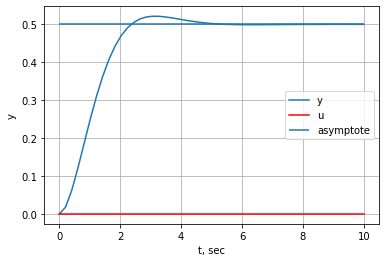

0 states have been removed from the model
1 states have been removed from the model
U: 2
final value: 1.0000000000000004


/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/control/timeresp.py:800: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


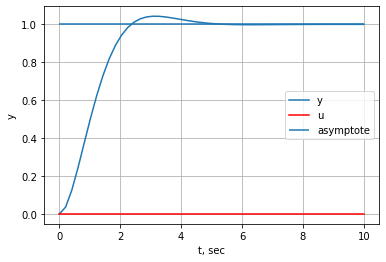

0 states have been removed from the model
1 states have been removed from the model
U: 
1
-
s

final value: inf


/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/control/xferfcn.py:651: RuntimeWarning: divide by zero encountered in double_scalars
  out[i][j] = (polyval(self.num[i][j], s) /
/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


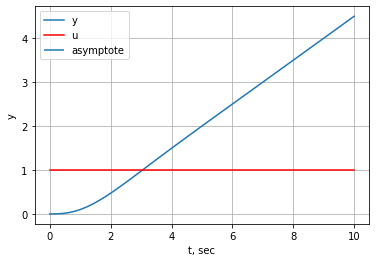

0 states have been removed from the model
1 states have been removed from the model
U: 
 1
---
s^2

final value: inf


/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/control/xferfcn.py:651: RuntimeWarning: divide by zero encountered in double_scalars
  out[i][j] = (polyval(self.num[i][j], s) /
/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


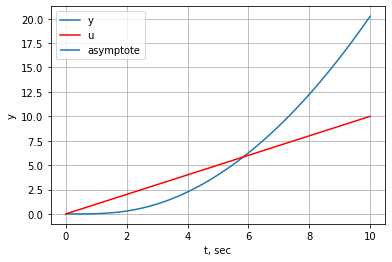

In [8]:
do_analysis(G2, [1, 2, 1/s, 1/s**2])

1 states have been removed from the model
0 states have been removed from the model
U: 1
final value: 0.0


/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/control/timeresp.py:800: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


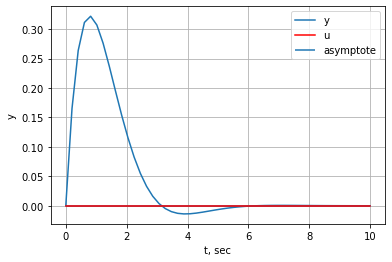

1 states have been removed from the model
0 states have been removed from the model
U: 2
final value: 0.0


/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/control/timeresp.py:800: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


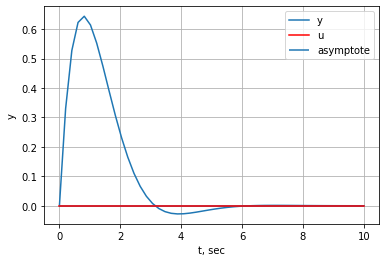

1 states have been removed from the model
1 states have been removed from the model
U: 
1
-
s

final value: 0.5000000000000002


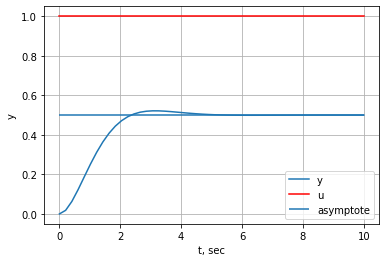

1 states have been removed from the model
1 states have been removed from the model
U: 
 1
---
s^2

final value: inf


/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/control/xferfcn.py:651: RuntimeWarning: divide by zero encountered in double_scalars
  out[i][j] = (polyval(self.num[i][j], s) /
/home/jgoppert/anaconda3/envs/aae301/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


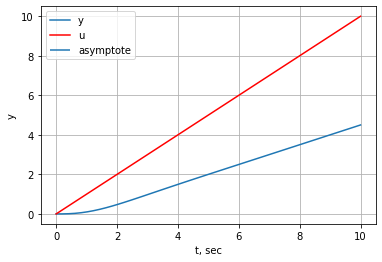

In [9]:
do_analysis(G2*s, [1, 2, 1/s, 1/s**2])

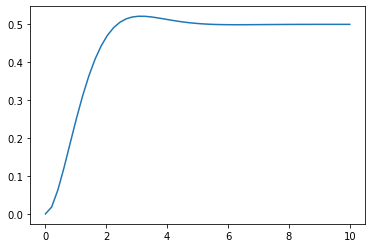

In [10]:
G2 = 1/(s**2 + 2*s + 2)
t, y = control.step_response(G2, T=np.linspace(0, 10))
plt.plot(t, y)